In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Нормальное распределение

Задание 1. Сгенерировать 2 выборки с нормальным распределением. Нарисовать график зависимости одной переменной от другой. 

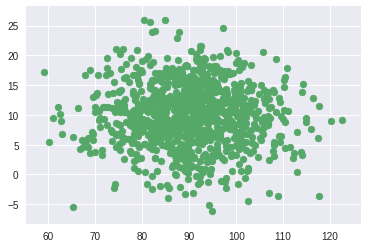

In [0]:

# зададим нормально распределенную случайную величину
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)
plt.scatter(x, y, marker='.')
#print(y)

Нарисовать гистограмму зависимости количества элементов от значений

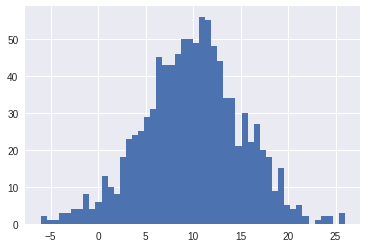

# Равномерное распределение.

Задание 2. Сгенерировать плотность равномерного распределения. 

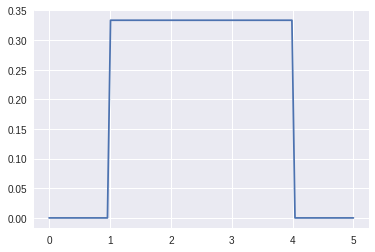

# Плотность вероятности

Сгенерировать плотности вероятности для разных распределений

Text(0.5, 0, '$x$')

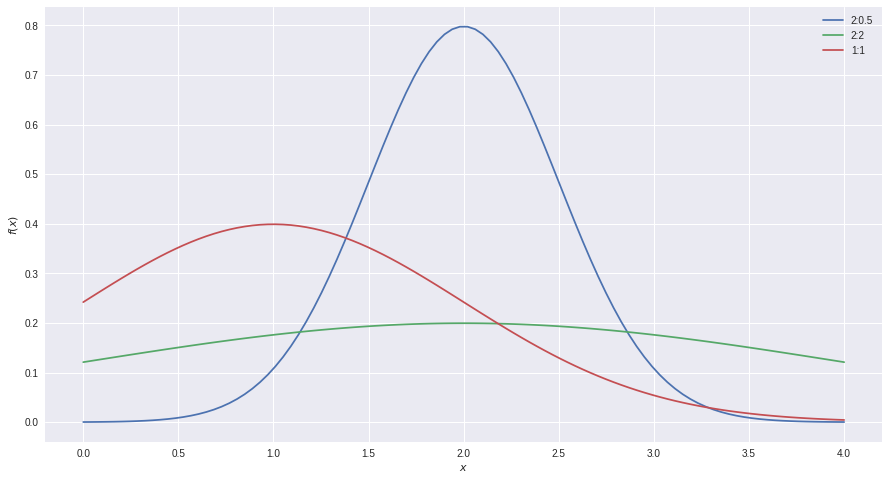

In [0]:
mu = 2.0
sigma = 0.5

# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)
norm_rv2 = sts.norm(2, 0.1)
norm_rv3 = sts.norm(2, 2)
norm_rv4 = sts.norm(1, 1)
x = np.linspace(0,4,100)

plt.figure(figsize=(15,8))
plt.plot(x, pdf)
# plt.plot(x, pdf2)
plt.plot(x, pdf3)
plt.plot(x, pdf4)

plt.legend(['2:0.5',  '2:2', '1:1'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Центральная предельная теорема. 

Сгенерировать 50 рандомных элементов.  Взять среднее значение этих элементов. 
Сгенерировать 100 элементов из средних значений 50 рандомных элементов. Нарисовать гистограмму распределения. Сравнить например гистограмму с 10 элементами. В чем разница?

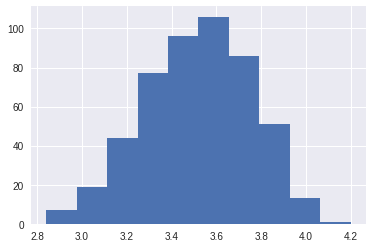

In [0]:
from numpy.random import randint

sampleMeans = []

for _ in range(500):
  # 500 элементов, значение которых от 1 до 7


# если построим график - можно увидеть нормальное распределение
plt.hist(sampleMeans)
plt.show()

# Корелляция Пирсона

1.0


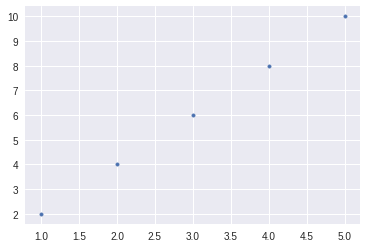

In [0]:
from scipy.stats import pearsonr
x = [1, 2, 3, 4, 5]

y = [2, 4, 6, 8, 10]
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print(corr)

# Корелляция с помощью pandas.

Загрузим данные с помощью pandas

In [0]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

In [0]:
df[:5]

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

Как вы думаете есть ли корелляция между Average Price и XLarge Bags? Нарисуйте данную корелляцию.

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform() # что должны написать в скобках в данном случае?
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

# Матрица ковариаций

Допустим даны 2 нормальных распределения. Сгенерировать данные. Чему равна матрица ковариаций?  

Text(0.5, 1.0, 'data')

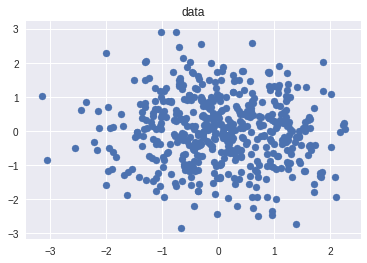

In [0]:
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x,y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('data')

Какое значение напечатает последняя строчка?

In [0]:
# посчитать ковариацию переменных (разброс относительно друг друга)
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# матрица ковариаций
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# считаем матрицу ковариаций для вектора X
cov_mat(X.T) # (or with np.cov(X.T))

array([[ 0.96153631, -0.062865  ],
       [-0.062865  ,  1.0027538 ]])

# Линейная алгебра (масштабирование, повороты с помощью умножения матриц)

In [0]:
A = np.array([[1,3],[5,6]])
print('A')
print(A)
B = np.array([[8,9],[3,4]])
print('B')
print(B)

A
[[1 3]
 [5 6]]
B
[[8 9]
 [3 4]]


In [0]:
A.dot(B)

array([[17, 21],
       [58, 69]])

Масштабирование: матрица вида [[n, 0], [0,n]]

In [0]:
n = 10
scale = np.array([[n,0],[0,n]])
A.dot(scale)

array([[10, 30],
       [50, 60]])

# Масштабирование распределений:

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([[ 0.47999813, -0.10843486],
       [-0.10843486, 12.32332346]])

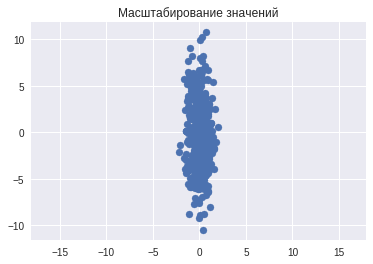

In [0]:
# центрирование переменных x, y
print(type(X))
X = X - np.mean(X, 0)

# Матрица масштабирования
sx, sy = 0.7, 3.4


# Умножаем матрицу масштабирования на X

print(type(Y))

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Масштабирование значений')
plt.axis('equal')

# Calculate covariance matrix
cov_mat(Y.T)

Изменить исходную матрицу с помощью поворотов

array([[ 5.76705948, -5.88855908],
       [-5.88855908,  7.0362621 ]])

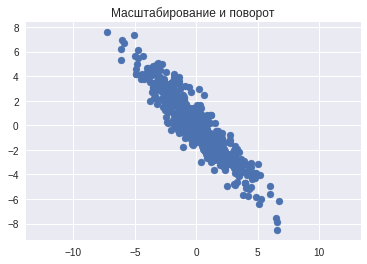

In [0]:
# масштабирование
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# повороты
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# перемножаем 2 матрицы: масштабирование и повороты


# перемножаем матрицу X (рандомные величины) на матрицу поворотов


plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Масштабирование и поворот')
plt.axis('equal');

# вычисление матрицы ковариаций и вывод на экран
cov_mat(Y.T)